# This script contains the following:
1. Importing libraries and data and renaming columns
2. The elbow technique
3. k-means clustering


# Importing libraries and data and renaming columns

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.preprocessing import StandardScaler
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = 'C:/Users/Mimi/Downloads/Achievement 6'

In [5]:
df = pd.read_excel('/Users/Mimi/Downloads/Achievement 6 /Data/housing_6.1.xlsx', index_col = [0])

In [6]:
df.head()

,Project ID,Project Name,Project Start Date,Project Completion Date,Building ID,Number,Street,Borough,Postcode,BBL,...,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units
0,72920,CONFIDENTIAL,2022-09-30,2022-09-30,NaN,----,----,Staten Island,NaN,NaN,...,0,1,0,0,0,0,0,1,1,1
1,72941,CONFIDENTIAL,2022-09-30,2022-09-30,NaN,----,----,Brooklyn,NaN,NaN,...,1,0,0,0,0,0,0,1,1,1
2,70648,3300 PALMER AVE.HPO.FY23,2022-09-29,2022-09-29,832306.0,3300,PALMER AVENUE,Bronx,10475.0,2.052280e+09,...,83,45,0,0,0,0,135,0,135,135
3,72917,CONFIDENTIAL,2022-09-23,2022-09-23,NaN,----,----,Staten Island,NaN,NaN,...,0,1,0,0,0,0,0,1,1,1
4,72918,CONFIDENTIAL,2022-09-23,2022-09-23,NaN,----,----,Brooklyn,NaN,NaN,...,0,1,0,0,0,0,0,1,1,1


In [7]:
df.columns

Index(['Project ID', 'Project Name', 'Project Start Date',
       'Project Completion Date', 'Building ID', 'Number', 'Street', 'Borough',
       'Postcode', 'BBL', 'BIN', 'Community Board', 'Council District',
       'Census Tract', 'NTA - Neighborhood Tabulation Area', 'Latitude',
       'Longitude', 'Latitude (Internal)', 'Longitude (Internal)',
       'Building Completion Date', 'Reporting Construction Type',
       'Extended Affordability Only', 'Prevailing Wage Status',
       'Extremely Low Income Units', 'Very Low Income Units',
       'Low Income Units', 'Moderate Income Units', 'Middle Income Units',
       'Other Income Units', 'Studio Units', '1-BR Units', '2-BR Units',
       '3-BR Units', '4-BR Units', '5-BR Units', '6-BR+ Units',
       'Unknown-BR Units', 'Counted Rental Units',
       'Counted Homeownership Units', 'All Counted Units', 'Total Units'],
      dtype='object')

In [8]:
newdf = df.drop(['Project ID', 'Project Name', 'Project Start Date',
       'Project Completion Date', 'Building ID', 'Number', 'Street', 'Borough',
       'Postcode', 'BBL', 'BIN', 'Community Board', 'Council District',
       'Census Tract', 'NTA - Neighborhood Tabulation Area', 'Latitude',
       'Longitude', 'Latitude (Internal)', 'Longitude (Internal)',
       'Building Completion Date', 'Reporting Construction Type',
       'Extended Affordability Only', 'Prevailing Wage Status',], axis=1)

In [9]:
newdf.head()

,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Studio Units,1-BR Units,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units
0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1
1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1
2,0,0,46,74,14,1,0,7,83,45,0,0,0,0,135,0,135,135
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1
4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1


In [10]:
#scaling data

scaler = StandardScaler()  

scaled_df = scaler.fit_transform(newdf)

In [11]:
scaled_df

array([[-0.25418339, -0.29237145, -0.33851637, ..., -0.1750309 ,
        -0.49122319, -0.47999803],
       [-0.25418339, -0.29237145, -0.33851637, ..., -0.1750309 ,
        -0.49122319, -0.47999803],
       [-0.25418339, -0.29237145,  0.93695621, ..., -0.19700381,
         1.44278904,  0.93607392],
       ...,
       [-0.25418339, -0.29237145, -0.33851637, ..., -0.1750309 ,
        -0.49122319, -0.47999803],
       [-0.25418339, -0.29237145, -0.36686021, ..., -0.1750309 ,
        -0.49122319, -0.47999803],
       [-0.25418339, -0.29237145, -0.36686021, ..., -0.1750309 ,
        -0.49122319, -0.47999803]])

# 2. The elbow technique

In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [13]:
score = [kmeans[i].fit(scaled_df).score(scaled_df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-109350.00000000004,
 -81935.96411139566,
 -72702.12298453272,
 -66631.72822335752,
 -60987.956842527696,
 -55570.70679622622,
 -53704.15107580039,
 -49010.84656083022,
 -44443.2596292252]

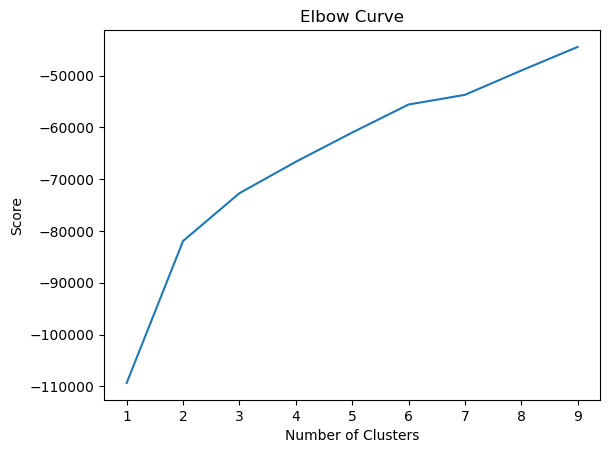

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# 3. k-means clustering

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2) 

In [16]:
# Fit the k-means object to the data.

kmeans.fit(newdf)

KMeans(n_clusters=2)

In [17]:
newdf['clusters'] = kmeans.fit_predict(scaled_df)

In [19]:
newdf.head()

,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Studio Units,1-BR Units,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,clusters
0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1
1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1
2,0,0,46,74,14,1,0,7,83,45,0,0,0,0,135,0,135,135,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1
4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1


In [22]:
newdf['clusters'].value_counts()

1    5453
0     622
Name: clusters, dtype: int64

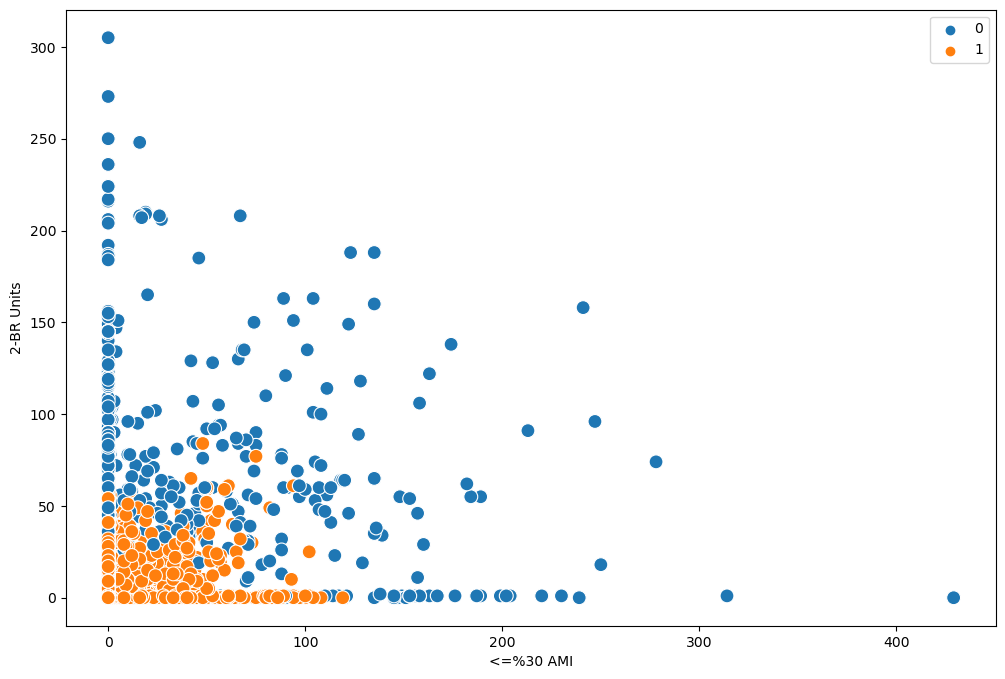

In [23]:
# Plot the clusters for the "Extremely Low Income Units" and "2-BR Units" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=newdf['Extremely Low Income Units'], y=df['2-BR Units'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('<=%30 AMI') # Label x-axis.
plt.ylabel('2-BR Units') # Label y-axis.
plt.show()

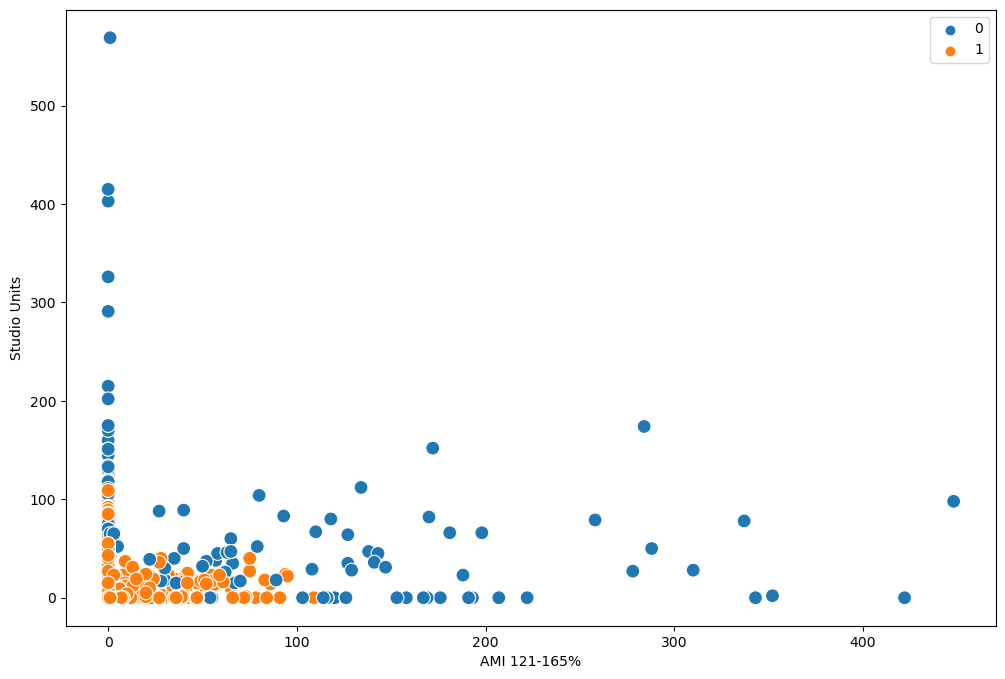

In [24]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=newdf['Middle Income Units'], y=newdf['Studio Units'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('AMI 121-165%') 
plt.ylabel('Studio Units') 
plt.show()

In [25]:
newdf.loc[newdf['clusters'] == 2, 'cluster'] = 'dark purple'
newdf.loc[newdf['clusters'] == 1, 'cluster'] = 'purple'
newdf.loc[newdf['clusters'] == 0, 'cluster'] = 'pink'


In [26]:
newdf.groupby('cluster').agg({'Middle Income Units':['mean', 'median'], 
                         'Extremely Low Income Units':['mean', 'median'], 
                         '2-BR Units':['mean', 'median'],
                          'Studio Units':['mean', 'median']})

Middle Income Units        Extremely Low Income Units         \
                       mean median                       mean median   
cluster                                                                
pink              17.136656    0.0                  31.545016    0.0   
purple             2.096094    0.0                   2.805428    0.0   

        2-BR Units        Studio Units         
              mean median         mean median  
cluster                                        
pink     69.787781   60.0    31.919614   18.0  
purple    5.362369    1.0     2.295434    0.0

In [27]:
#Again this data set really doesn't quite lend itself to machine learning and clustering because the variables are largely independnt, and there is a lot of information in the string variables

In [28]:
#In the future I hope to find a form of machine learning that can work with string and geographic location coordinates, as I think this will be most pertinent to my analysis